In [1]:
!pip install rasterio

In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Variables

### Inventario: 

(19705,)

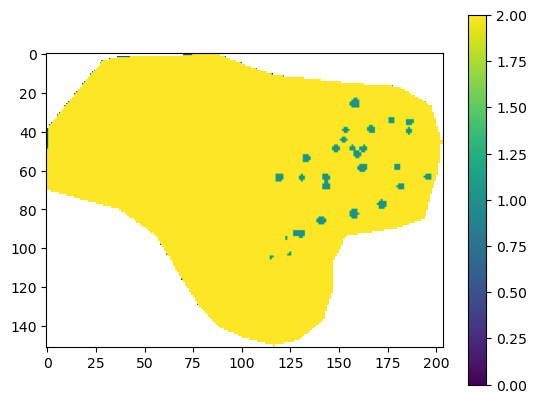

In [3]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/MenM1.tif?raw=true')
inventario=raster.read(1)
inventario=np.where(inventario>=3,np.nan,inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

### Pendiente:

(19705,)

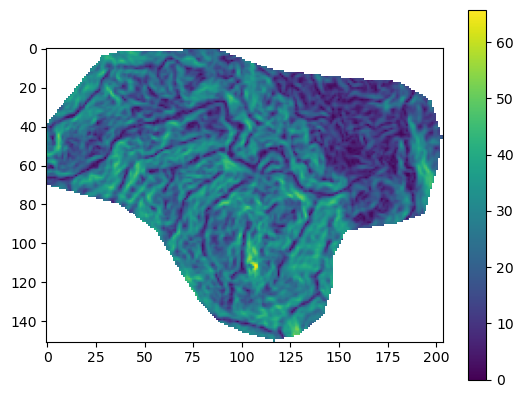

In [4]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/PEND1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
plt.imshow(pendiente)
plt.colorbar()
pendiente_vector_MenM.shape
     

### Aspecto: 

(19705,)

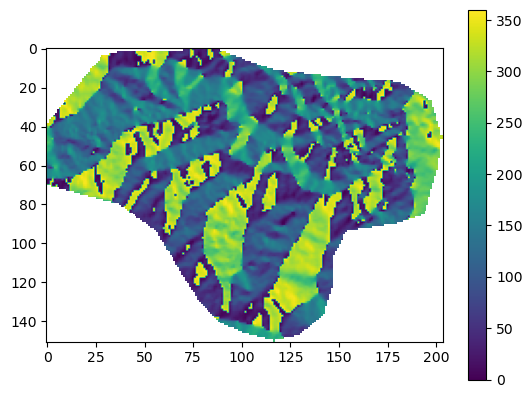

In [5]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

### Elevacion:

(19705,)

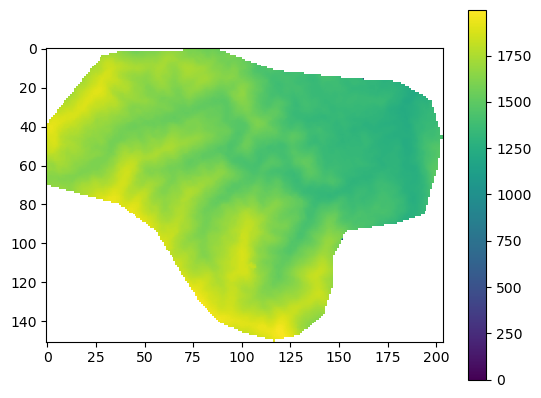

In [6]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/elev_final1.tif?raw=true')
elevacion=raster.read(1)
elevacion=np.where(elevacion<0,np.nan,elevacion)
elevacion_vector=elevacion.ravel()
elevacion_vector_MenM=elevacion_vector[~np.isnan(elevacion_vector)]
plt.imshow(elevacion)
plt.colorbar()
elevacion_vector_MenM.shape

### Cobertura:

(19705,)

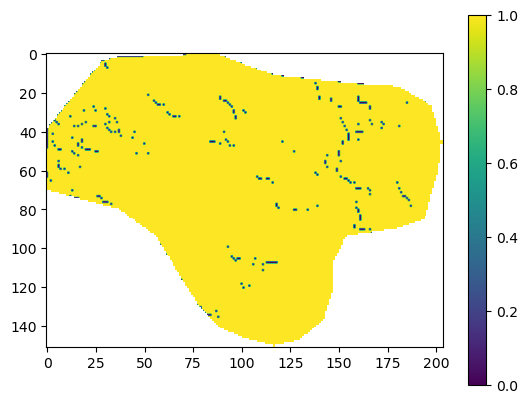

In [7]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Cobert_final1.tif?raw=true')
cobertura=raster.read(1)
cobertura=np.where(cobertura>=3,np.nan,cobertura)
cobertura_vector=cobertura.ravel()
cobertura_vector_MenM=cobertura_vector[~np.isnan(cobertura_vector)]
plt.imshow(cobertura)
plt.colorbar()
cobertura_vector_MenM.shape

# Metodo LR


In [8]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM,'elevacion':elevacion_vector_MenM, 'cobertura':cobertura_vector_MenM}
df = pd.DataFrame(d)
df.head()
     

,inventario,pendiente,aspecto,elevacion,cobertura
0,0.0,20.832821,38.945808,1621.0,0.0
1,0.0,21.867115,45.000000,1614.0,0.0
2,0.0,20.780851,49.332314,1603.0,1.0
3,0.0,16.425795,31.504267,1596.0,1.0
4,0.0,15.849223,358.363434,1595.0,1.0


In [9]:
var_names2=['aspecto','pendiente','elevacion'] #se normalizan los valores
for var in var_names2:
 df[var]=(df[var]-df[var].mean())/df[var].std()
df.head()
     

,inventario,pendiente,aspecto,elevacion,cobertura
0,0.0,-0.193369,-1.127232,0.247112,0.0
1,0.0,-0.089515,-1.072825,0.208382,0.0
2,0.0,-0.198587,-1.033892,0.147520,1.0
3,0.0,-0.635877,-1.194107,0.108790,1.0
4,0.0,-0.693771,1.743276,0.103257,1.0


In [10]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "inventario ~ elevacion + pendiente + aspecto", data = df).fit()
print(lr.summary())

ValueError: endog must be in the unit interval.

In [ ]:
X=df.drop("inventario", axis=1)
y=df['inventario']
X.head()

In [ ]:
dummy_cobertura=pd.get_dummies(X['cobertura'],prefix='cob')
column_name=X.columns.values.tolist()
column_name.remove('cobertura')
X1=X[column_name].join(dummy_cobertura)
X1.head()
     

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced', solver='newton-cg')
model

In [ ]:
result=model.fit(X1,y)
print(result.coef_)


In [ ]:
y_pred=result.predict(X1)
y_pred

In [ ]:
result=model.fit(X1,y)
y_prob=result.predict_proba(X1)
y_prob

In [ ]:
y_probs=result.predict_proba(X1)[:,1]
y_probs

In [ ]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
elevacion_vector2=np.nan_to_num(elevacion_vector)
cobertura_vector2=np.nan_to_num(cobertura_vector)

In [ ]:
f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'elevacion':elevacion_vector2,'cobertura':cobertura_vector2 }
x_map=pd.DataFrame(f)
dummy_geomorfologia=pd.get_dummies(x_map['cobertura'],prefix='cob')
column_name=x_map.columns.values.tolist()
column_name.remove('cobertura')
x_map=x_map[column_name].join(dummy_cobertura)
x_map=x_map.drop('cob_0.0',axis=1)

In [ ]:
y_pred=model.predict_proba(x_map)[:,1]

In [ ]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/PEND1.tif?raw=true')
pendiente=raster.read(1)

In [ ]:
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();